In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
import tensorflow as tf

In [2]:
print("TensorFlow Version:",tf.__version__)

TensorFlow Version: 2.16.2


In [3]:
print("Is GPU Available:", tf.config.list_physical_devices('GPU'))

Is GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
## Load the Dataset
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2383,2384,15642468,Clark,697,France,Male,42,9,132739.26,2,0,0,174667.65,0
3812,3813,15790267,Onuoha,625,France,Female,40,7,141267.67,1,0,1,177397.49,0
1756,1757,15670702,Smith,618,France,Male,37,2,168178.21,2,0,1,101273.23,0
4875,4876,15619616,Costa,571,France,Female,33,9,102017.25,2,0,0,128600.49,0
6907,6908,15661433,Zetticci,519,France,Male,34,5,0.00,1,1,0,68479.60,0
4911,4912,15691004,Yu,407,Spain,Male,37,1,0.00,1,1,1,49161.12,1
3250,3251,15587419,Shipton,611,France,Male,58,8,0.00,2,0,1,107665.68,1
8948,8949,15662501,Ebelechukwu,583,France,Male,48,3,91246.53,1,1,0,60017.46,1
4642,4643,15657449,Chukwuma,446,Germany,Male,25,3,136202.78,1,1,0,176743.51,0
9834,9835,15799358,Vincent,516,France,Female,46,6,62212.29,1,0,1,171681.86,1


In [6]:
## Preprocess the data 
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [7]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
## Encode Categorical Variable
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

In [11]:
## OneHotEncoding Geography Column
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
geo_encoder = onehot_encoder.fit_transform(data[['Geography']])

In [12]:
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [14]:
geo_encoder_df = pd.DataFrame(geo_encoder, columns=onehot_encoder.get_feature_names_out(['Geography']))

In [15]:
geo_encoder_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [16]:
## Combine One Hot Encoded Columns with the original data
data = pd.concat([data.drop('Geography',axis=1),geo_encoder_df],axis=1)

In [17]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [18]:
## Save the encoder
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder,file)

In [19]:
## Divide the dataset into independent and dependent features 

x_train, x_test, y_train, y_test = train_test_split(data.drop('Exited',axis=1),data['Exited'],test_size=0.2,random_state=42)

In [20]:
## Scale down the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
x_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [22]:
## Save the Scaler pickle format 

with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

## ANN Implementation

In [23]:
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.16.2
Keras Version: 3.8.0


In [24]:
import datetime

In [28]:
(x_train.shape[1],)

(12,)

In [29]:
LAYERS = [tf.keras.layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],),name='Input_Layer'),
          tf.keras.layers.Dense(32,activation='relu',name='Hidden_Layer'),
          tf.keras.layers.Dense(1,activation='sigmoid',name='Output_Layer')
]

/Users/rithul.v/Desktop/ANN_Projects/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model = tf.keras.models.Sequential(LAYERS)

2025-01-21 22:58:26.415155: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-01-21 22:58:26.415203: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-01-21 22:58:26.415215: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-01-21 22:58:26.415466: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-21 22:58:26.415493: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
import time
import os 

def get_log_path(log_dir="logs/fit"):
    filename = time.strftime("log_%Y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir,filename)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

Saving logs at logs/fit/log_2025_01_21_23_07_38


In [37]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [39]:
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),callbacks=[tb_cb,early_stopping_cb])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8122 - loss: 0.4312 - val_accuracy: 0.8155 - val_loss: 0.4249
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8071 - loss: 0.4430 - val_accuracy: 0.8125 - val_loss: 0.4264
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8019 - loss: 0.4522 - val_accuracy: 0.8175 - val_loss: 0.4262
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8016 - loss: 0.4538 - val_accuracy: 0.8140 - val_loss: 0.4247
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8134 - loss: 0.4614 - val_accuracy: 0.8035 - val_loss: 0.4280
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7972 - loss: 0.4710 - val_accuracy: 0.7600 - val_loss: 0.5983
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8016 - loss: 0.5073 - val_accuracy: 0.8125 - val_loss: 0.4281
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8089 - loss: 0.4748 - val_accu

In [40]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.808250,0.443837,0.8155,0.424925
1,0.803875,0.448457,0.8125,0.426392
2,0.804500,0.453909,0.8175,0.426245
3,0.804000,0.455594,0.8140,0.424720
4,0.805500,0.477069,0.8035,0.427954
5,0.803375,0.474672,0.7600,0.598312
6,0.795750,0.516240,0.8125,0.428115
7,0.800750,0.492969,0.7845,0.522159
8,0.797125,0.486241,0.8020,0.547296
9,0.797250,0.527195,0.8065,0.420047


<Axes: >

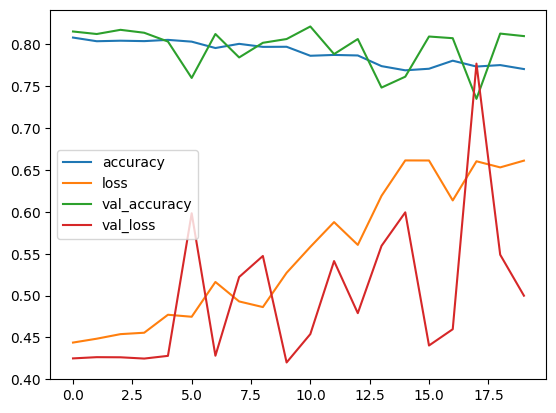

In [41]:
pd.DataFrame(history.history).plot()

In [42]:
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7950 - loss: 0.4280


[0.42004746198654175, 0.8065000176429749]

In [44]:
%load_ext tensorboard

In [46]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 5485), started 0:00:42 ago. (Use '!kill 5485' to kill it.)

In [47]:
## Save the Model

def save_model_path(model_dir="Trained_Model"):
    os.makedirs(model_dir,exist_ok=True)
    filename = time.strftime("Model_%Y_%m_%d_%H_%M_%S.keras")
    model_path = os.path.join(model_dir,filename)
    print(f"Saving logs at {model_path}")
    return model_path

model_dir = save_model_path()

Saving logs at Trained_Model/Model_2025_01_21_23_23_02.keras


In [48]:
tf.keras.models.save_model(model=model,filepath=model_dir)